In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [18, 18]}, font_scale=1.4)

In [2]:
df = pd.read_csv('./data/hypothyroid.csv')
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [3]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [4]:
df.describe().T

,count,unique,top,freq
age,3772,93,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3767    False
3768    False
3769    False
3770    False
3771    False
Length: 3772, dtype: bool

In [7]:
df=df.replace({"?":np.NAN})

In [8]:
df.isna().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

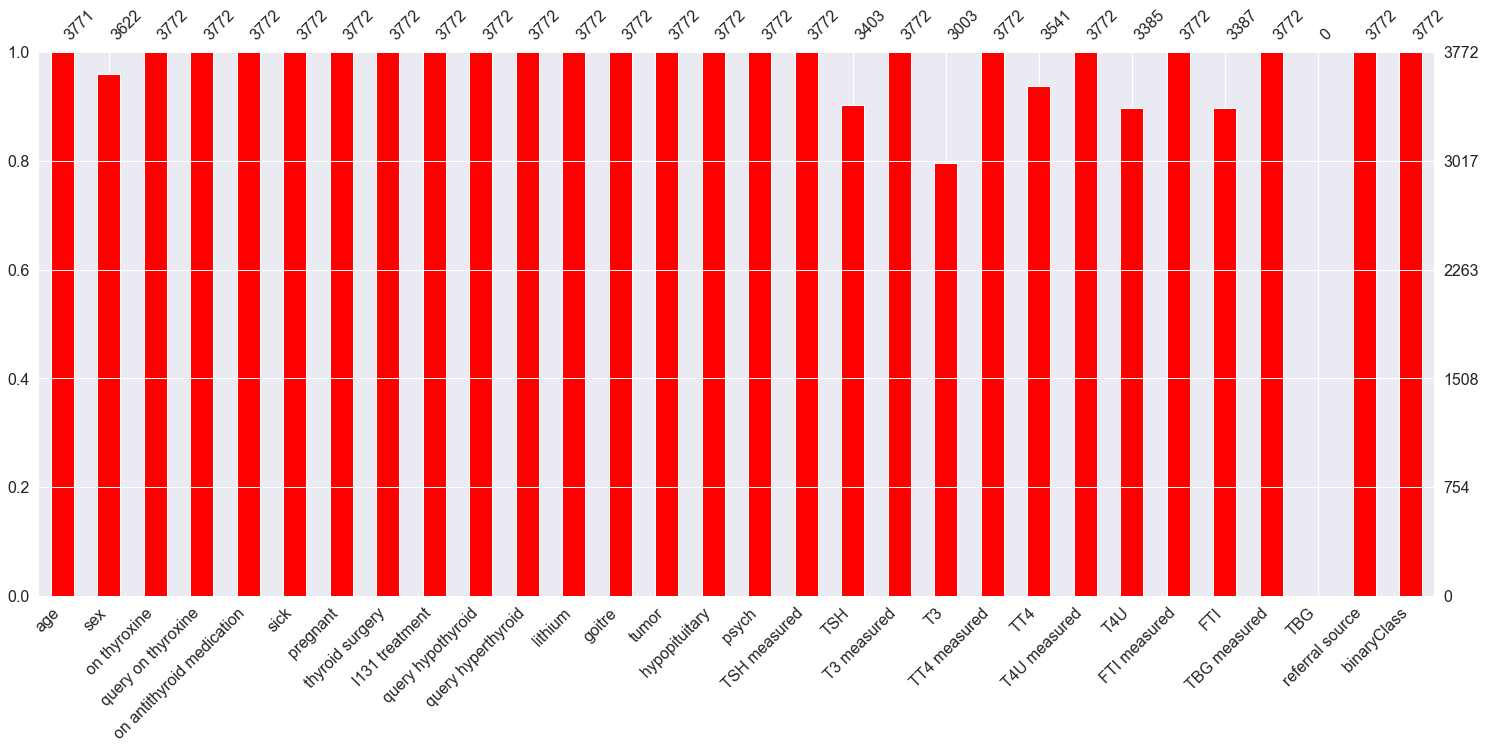

In [9]:
import missingno as msn
msn.bar(df,color="red");

### common 

In [10]:
df=df.replace({"t":1,"f":0})

In [11]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,NaN,SVHC,P
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,NaN,0,NaN,0,NaN,other,P
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,NaN,other,P
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,NaN,0,NaN,0,NaN,other,P
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,NaN,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,other,P
3768,68,F,0,0,0,0,0,0,0,0,...,1,124,1,1.08,1,114,0,NaN,SVI,P
3769,74,F,0,0,0,0,0,0,0,0,...,1,112,1,1.07,1,105,0,NaN,other,P
3770,72,M,0,0,0,0,0,0,0,0,...,1,82,1,0.94,1,87,0,NaN,SVI,P


In [12]:
df.dtypes

age                           object
sex                           object
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
T

### TBG "Nan values"

In [13]:
df = df.drop('TBG', axis=1)

In [14]:
df.isna().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

### Sex

In [15]:
# df.shape[0] - (df['sex'].value_counts()['F'] + df['sex'].value_counts()['M'])

In [16]:
df['sex'].isna().sum()

150

In [17]:
df['sex'].fillna(value = df['sex'].mode()[0], inplace=True)

In [18]:
df['sex'].isna().sum()

0

In [19]:
df=df.replace({"F":1,"M":0})

### Age

In [20]:
# colWithNoNan = df['age'].dropna()
# colWithNoNan = colWithNoNan.astype(int)
# ageMx=colWithNoNan.max()
# ageMx

In [21]:
df['age'].isna().sum()

1

In [22]:
df[df['age'].isna()]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
1985,NaN,1,1,0,0,0,0,0,1,0,...,1.5,1,120,1,0.82,1,146,0,other,P


In [23]:
colWithNoNan = df['age'].dropna()
colWithNoNan = colWithNoNan.astype(int)
mn = colWithNoNan.mean()
df['age'].fillna(value = mn, inplace=True)
df['age'] = df['age'].astype(int)

In [24]:
mn

51.62715460090162

In [25]:
df['age'].isna().sum()

0

In [26]:
df['age'].dtype

dtype('int32')

In [27]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,1,0,0,0,0,0,0,0,0,...,2.5,1,125,1,1.14,1,109,0,SVHC,P
1,23,1,0,0,0,0,0,0,0,0,...,2,1,102,0,NaN,0,NaN,0,other,P
2,46,0,0,0,0,0,0,0,0,0,...,NaN,1,109,1,0.91,1,120,0,other,P
3,70,1,1,0,0,0,0,0,0,0,...,1.9,1,175,0,NaN,0,NaN,0,other,P
4,70,1,0,0,0,0,0,0,0,0,...,1.2,1,61,1,0.87,1,70,0,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,1,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,0,NaN,0,other,P
3768,68,1,0,0,0,0,0,0,0,0,...,2.1,1,124,1,1.08,1,114,0,SVI,P
3769,74,1,0,0,0,0,0,0,0,0,...,1.8,1,112,1,1.07,1,105,0,other,P
3770,72,0,0,0,0,0,0,0,0,0,...,2,1,82,1,0.94,1,87,0,SVI,P


In [28]:
# age = df['age']
# y=age.max()-age.min()
# y=np.arange(0,y)
# y=pd.DataFrame(y)
# sns.histplot(age)


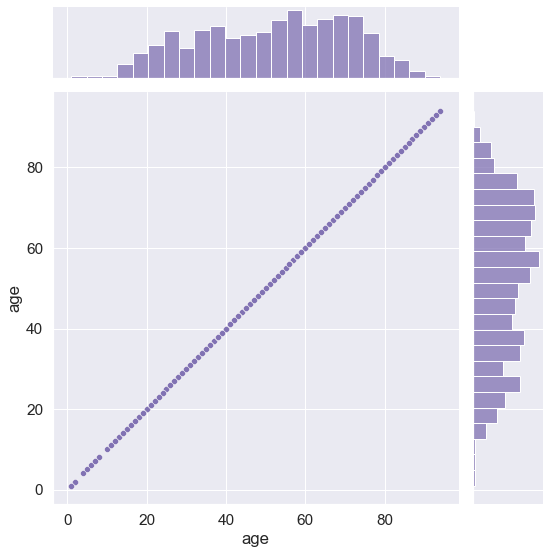

In [29]:
sns.jointplot(x='age', y='age', data=df, kind='scatter', height=8, color='m')

<AxesSubplot:xlabel='binaryClass', ylabel='count'>

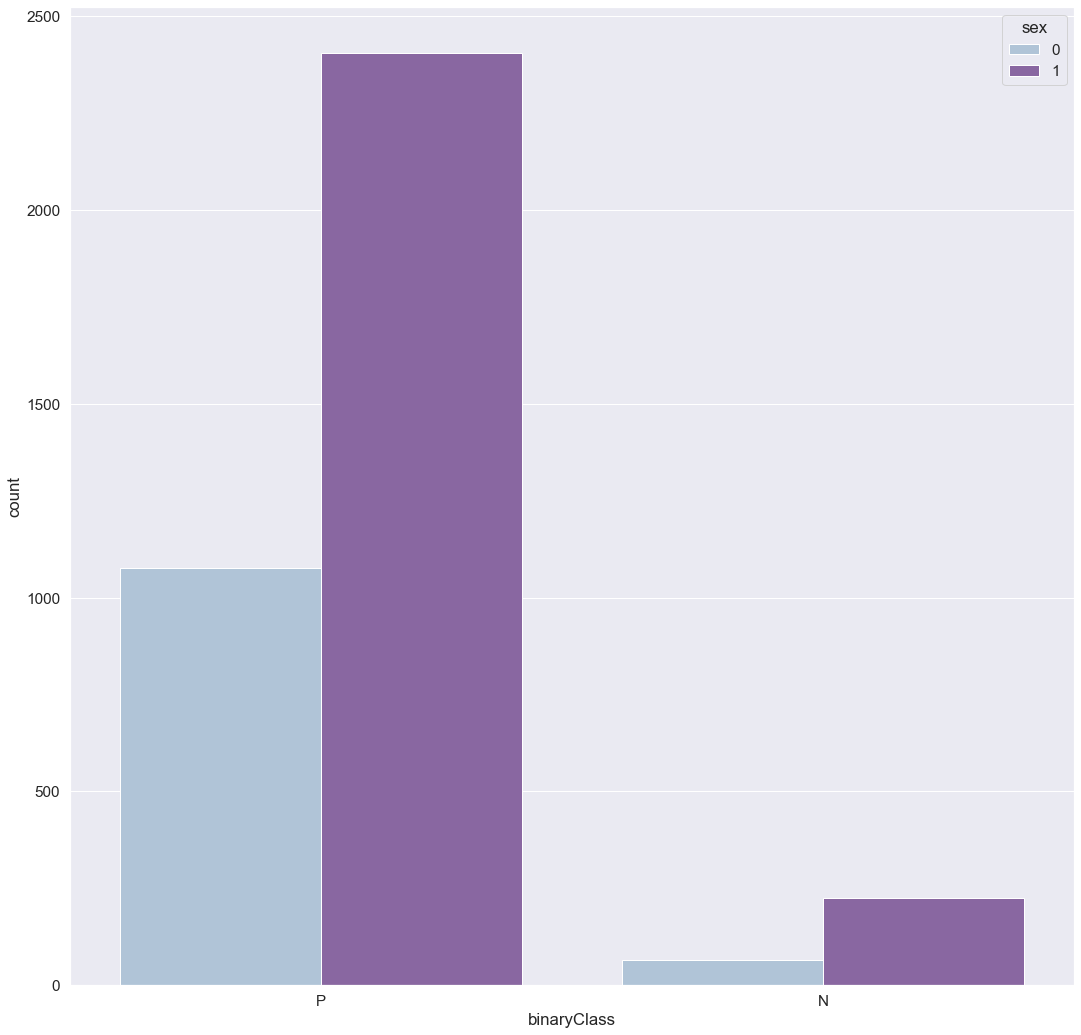

In [30]:
sns.countplot(x='binaryClass', data=df, hue='sex', palette='BuPu')

<AxesSubplot:xlabel='binaryClass', ylabel='age'>

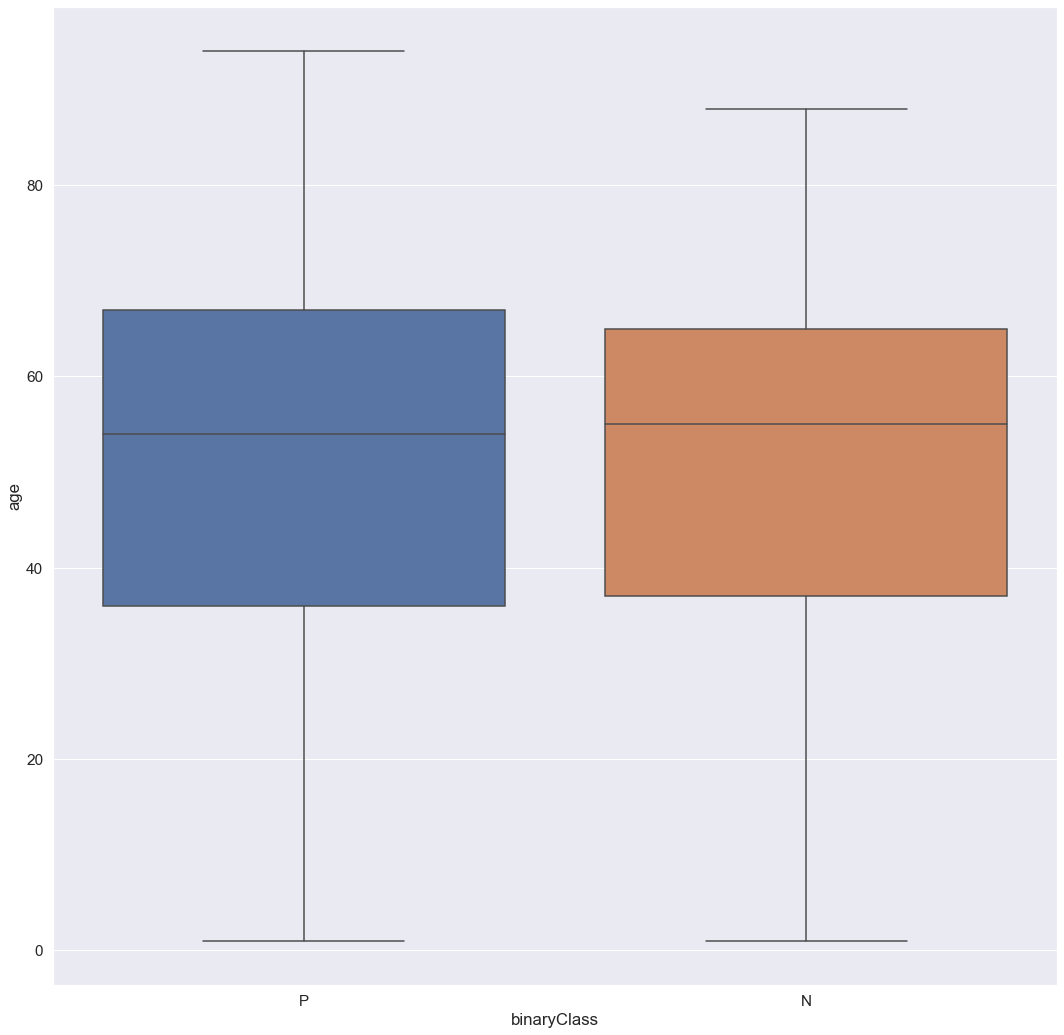

In [31]:
sns.boxplot(x='binaryClass', y='age', data=df)

### Binary class

In [32]:
df["binaryClass"].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [33]:
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":1})

In [34]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,1,0,0,0,0,0,0,0,0,...,2.5,1,125,1,1.14,1,109,0,SVHC,0
1,23,1,0,0,0,0,0,0,0,0,...,2,1,102,0,NaN,0,NaN,0,other,0
2,46,0,0,0,0,0,0,0,0,0,...,NaN,1,109,1,0.91,1,120,0,other,0
3,70,1,1,0,0,0,0,0,0,0,...,1.9,1,175,0,NaN,0,NaN,0,other,0
4,70,1,0,0,0,0,0,0,0,0,...,1.2,1,61,1,0.87,1,70,0,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,1,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,0,NaN,0,other,0
3768,68,1,0,0,0,0,0,0,0,0,...,2.1,1,124,1,1.08,1,114,0,SVI,0
3769,74,1,0,0,0,0,0,0,0,0,...,1.8,1,112,1,1.07,1,105,0,other,0
3770,72,0,0,0,0,0,0,0,0,0,...,2,1,82,1,0.94,1,87,0,SVI,0


In [35]:
df["binaryClass"].value_counts()

0    3481
1     291
Name: binaryClass, dtype: int64

In [36]:
df['binaryClass'].isna().sum()

0

In [37]:
df['binaryClass']

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: binaryClass, Length: 3772, dtype: int64

In [38]:
df.isna().sum()

age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3772.0,51.626988,18.978265,1.0,36.0,54.0,67.0,94.0
sex,3772.0,0.697243,0.459512,0.0,0.0,1.0,1.0,1.0
on thyroxine,3772.0,0.123012,0.328494,0.0,0.0,0.0,0.0,1.0
query on thyroxine,3772.0,0.013256,0.114382,0.0,0.0,0.0,0.0,1.0
on antithyroid medication,3772.0,0.011400,0.106174,0.0,0.0,0.0,0.0,1.0
sick,3772.0,0.038971,0.193552,0.0,0.0,0.0,0.0,1.0
pregnant,3772.0,0.014051,0.117716,0.0,0.0,0.0,0.0,1.0
thyroid surgery,3772.0,0.014051,0.117716,0.0,0.0,0.0,0.0,1.0
I131 treatment,3772.0,0.015642,0.124101,0.0,0.0,0.0,0.0,1.0
query hypothyroid,3772.0,0.062036,0.241253,0.0,0.0,0.0,0.0,1.0


In [40]:
df.describe().T.shape

(23, 8)

### Cells has one value

In [41]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'referral source',
       'binaryClass'],
      dtype='object')

In [42]:
cols = df.columns.values


In [43]:
hasOneVal=[]
for col in cols:
    if(df[col].value_counts().shape[0] == 1):
        hasOneVal.append(col)


In [44]:
hasOneVal

['TBG measured']

### Drop cells that has one values "TBG measured"

In [45]:
df['TBG measured'].isna().sum()

0

In [46]:
df['TBG measured'].value_counts()

0    3772
Name: TBG measured, dtype: int64

In [47]:
df = df.drop('TBG measured', axis=1)

### NaN Classes

In [48]:
NanClass = df.isna().sum()[df.isna().sum().values > 0].index.values
NanClass

array(['TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype=object)

### Filling Nan Classes "TSH', 'T3', 'TT4', 'T4U', 'FTI"

In [49]:
df.dtypes

age                           int32
sex                           int64
on thyroxine                  int64
query on thyroxine            int64
on antithyroid medication     int64
sick                          int64
pregnant                      int64
thyroid surgery               int64
I131 treatment                int64
query hypothyroid             int64
query hyperthyroid            int64
lithium                       int64
goitre                        int64
tumor                         int64
hypopituitary                 int64
psych                         int64
TSH measured                  int64
TSH                          object
T3 measured                   int64
T3                           object
TT4 measured                  int64
TT4                          object
T4U measured                  int64
T4U                          object
FTI measured                  int64
FTI                          object
referral source              object
binaryClass                 

In [50]:
# colWithNoNan = df['TSH'].dropna()
# # colWithNoNan.isna().sum()
# colWithNoNan = colWithNoNan.astype(float)
# colWithNoNan.mean()

In [51]:
for i in NanClass:
    colWithNoNan = df[i].dropna()
    colWithNoNan = colWithNoNan.astype(float)
    mn = colWithNoNan.mean()
    df[i].fillna(value = mn, inplace=True)
    df[i] = df[i].astype(float)

In [52]:
df.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
referral source              0
binaryClass                  0
dtype: int64

In [53]:
df.dtypes

age                            int32
sex                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
referral source               object
b

In [54]:
# df['TSH'].fillna(value = df['TSH'].mean, inplace=True)
# df['T3'].fillna(value = df['T3'].mean, inplace=True)
# df['TT4'].fillna(value = df['TT4'].mean, inplace=True)
# df['T4U'].fillna(value = df['T4U'].mean, inplace=True)
# df['FTI'].fillna(value = df['FTI'].mean, inplace=True)

### referral source 

In [55]:
del df["referral source"]

### Visaulize

In [56]:
df_corr = df.corr()
df_corr

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
age,1.000000,-0.003618,0.017528,-0.018244,-0.066981,0.085247,-0.119439,-0.030533,0.056410,0.043339,...,-5.845130e-02,7.446007e-02,-2.273157e-01,6.997054e-02,-4.140851e-02,8.838673e-02,-1.708539e-01,8.751669e-02,5.409760e-02,-0.001699
sex,-0.003618,1.000000,0.095709,-0.044712,0.027278,-0.007438,0.078665,0.034543,0.022612,0.042687,...,3.361550e-02,-7.135524e-02,6.421320e-02,-7.685721e-02,1.675458e-01,-5.166161e-02,2.218835e-01,-5.253222e-02,4.189999e-02,0.049960
on thyroxine,0.017528,0.095709,1.000000,0.005995,-0.002201,-0.042053,0.010152,0.037583,0.063373,0.094412,...,1.713835e-02,-1.450614e-01,6.484854e-03,2.496392e-02,2.128008e-01,3.885187e-02,4.636815e-02,3.828521e-02,1.857484e-01,-0.081060
query on thyroxine,-0.018244,-0.044712,0.005995,1.000000,-0.012446,0.012594,0.045247,0.005858,-0.014610,-0.029808,...,-9.452645e-03,-3.340948e-02,-6.465900e-03,2.960328e-02,-4.702231e-03,3.155031e-02,4.384229e-04,3.141982e-02,-3.550040e-03,-0.007448
on antithyroid medication,-0.066981,0.027278,-0.002201,-0.012446,1.000000,-0.021624,0.072050,-0.012819,0.006589,-0.017264,...,-1.066775e-02,1.094961e-02,7.921225e-02,-2.464939e-02,2.381055e-02,-2.953201e-02,6.036462e-02,-2.978795e-02,-1.660334e-02,-0.021689
sick,0.085247,-0.007438,-0.042053,0.012594,-0.021624,1.000000,-0.024040,-0.000762,-0.025384,0.027718,...,-2.209868e-02,6.695144e-03,-7.647155e-02,-5.699708e-03,-3.700575e-02,9.399140e-03,-3.906941e-02,9.068046e-03,-2.118940e-02,-0.001749
pregnant,-0.119439,0.078665,0.010152,0.045247,0.072050,-0.024040,1.000000,-0.014251,-0.015048,-0.021364,...,-1.969336e-02,2.686496e-02,1.811466e-01,2.109671e-02,1.724903e-01,3.294152e-02,3.347023e-01,3.280814e-02,-1.669842e-02,-0.034516
thyroid surgery,-0.030533,0.034543,0.037583,0.005858,-0.012819,-0.000762,-0.014251,1.000000,0.003104,-0.012026,...,2.623041e-02,-2.345292e-02,-2.414553e-02,3.049073e-02,-2.180623e-02,1.067220e-02,2.792243e-02,1.048764e-02,-3.182840e-02,-0.017633
I131 treatment,0.056410,0.022612,0.063373,-0.014610,0.006589,-0.025384,-0.015048,0.003104,1.000000,0.047296,...,-4.125253e-03,1.504369e-04,1.205665e-02,3.219634e-02,-8.848056e-03,2.854012e-02,9.405826e-03,2.838493e-02,-1.681719e-02,0.003590
query hypothyroid,0.043339,0.042687,0.094412,-0.029808,-0.017264,0.027718,-0.021364,-0.012026,0.047296,1.000000,...,2.597789e-02,-6.354673e-02,-4.749603e-02,2.443261e-02,-9.012716e-03,1.451686e-02,1.383247e-02,1.409980e-02,-1.971919e-02,0.086282


<AxesSubplot:>

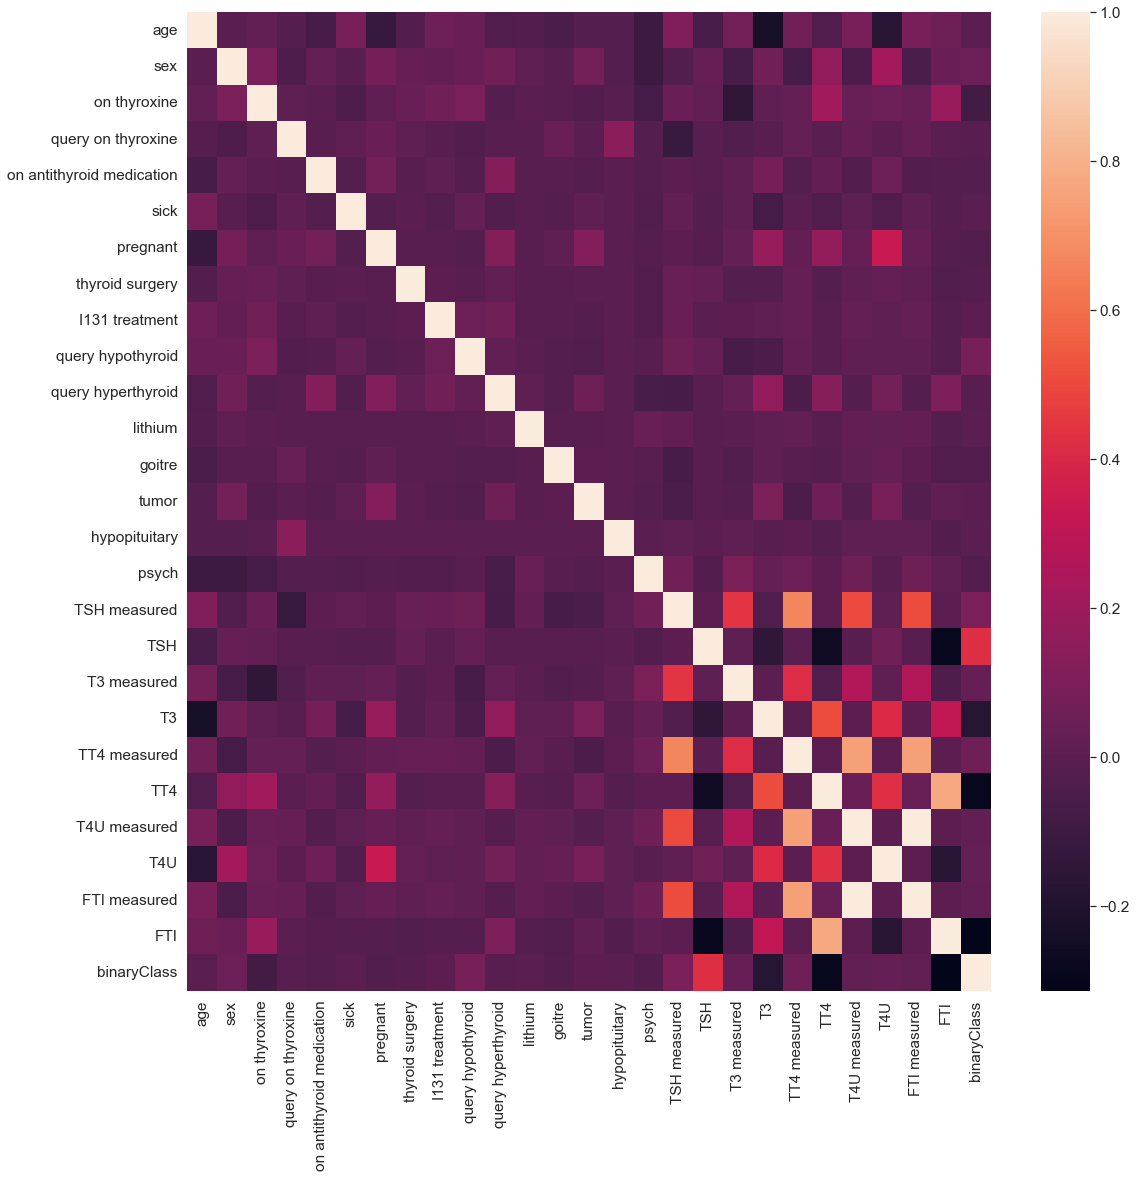

In [57]:
sns.heatmap(df_corr)

In [58]:
# del df['TT4']
# del df['FTI']
# del df['T3']
# del df['age']
# del df['sex']
# del df['TSH']



In [59]:

# g = sns.PairGrid(df)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)

In [60]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
0,41,1,0,0,0,0,0,0,0,0,...,1.300000,1,2.5000,1,125.000000,1,1.140,1,109.000000,0
1,23,1,0,0,0,0,0,0,0,0,...,4.100000,1,2.0000,1,102.000000,0,0.995,0,110.469649,0
2,46,0,0,0,0,0,0,0,0,0,...,0.980000,0,2.0135,1,109.000000,1,0.910,1,120.000000,0
3,70,1,1,0,0,0,0,0,0,0,...,0.160000,1,1.9000,1,175.000000,0,0.995,0,110.469649,0
4,70,1,0,0,0,0,0,0,0,0,...,0.720000,1,1.2000,1,61.000000,1,0.870,1,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,1,0,0,0,0,0,0,0,0,...,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649,0
3768,68,1,0,0,0,0,0,0,0,0,...,1.000000,1,2.1000,1,124.000000,1,1.080,1,114.000000,0
3769,74,1,0,0,0,0,0,0,0,0,...,5.100000,1,1.8000,1,112.000000,1,1.070,1,105.000000,0
3770,72,0,0,0,0,0,0,0,0,0,...,0.700000,1,2.0000,1,82.000000,1,0.940,1,87.000000,0


In [61]:
df.dtypes

age                            int32
sex                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
binaryClass                    int64
d

### Data Splitting (with validation)

In [156]:
dis = df
X = dis.iloc[:, :-1]
y = dis.iloc[:, -1]

In [157]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42) 

# from sklearn.model_selection import GridSearchCV
# param_grid = {'max_depth': np.arange(1,10),}

# from sklearn.ensemble import RandomForestClassifier
# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# pd.DataFrame(grid_search.cv_results_)

In [158]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [160]:
param_grid = {
    'max_depth': np.arange(1,11),
    'n_estimators': np.arange(1,30,5)
}
rf = RandomForestClassifier()

In [161]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_val, y_val)

print("Best Parameters: ",grid_search.best_params_)

Best Parameters:  {'max_depth': 8, 'n_estimators': 26}


In [162]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002600,4.898836e-04,0.001401,0.000490,1,1,"{'max_depth': 1, 'n_estimators': 1}",0.933884,0.917355,0.925620,0.975207,0.916667,0.933747,0.021658,52
1,0.008598,1.957208e-03,0.002609,0.000496,1,6,"{'max_depth': 1, 'n_estimators': 6}",0.917355,0.917355,0.917355,0.909091,0.941667,0.920565,0.011026,57
2,0.010024,8.880419e-04,0.001970,0.000609,1,11,"{'max_depth': 1, 'n_estimators': 11}",0.917355,0.917355,0.917355,0.925620,0.933333,0.922204,0.006420,55
3,0.012995,6.624760e-04,0.002020,0.000611,1,16,"{'max_depth': 1, 'n_estimators': 16}",0.925620,0.917355,0.917355,0.909091,0.933333,0.920551,0.008256,58
4,0.019037,3.276294e-03,0.002969,0.000651,1,21,"{'max_depth': 1, 'n_estimators': 21}",0.917355,0.917355,0.917355,0.909091,0.925000,0.917231,0.005033,59
5,0.020363,4.816593e-04,0.003009,0.000039,1,26,"{'max_depth': 1, 'n_estimators': 26}",0.917355,0.917355,0.917355,0.909091,0.916667,0.915565,0.003248,60
6,0.002619,4.744168e-04,0.001221,0.000375,2,1,"{'max_depth': 2, 'n_estimators': 1}",0.925620,0.933884,0.917355,0.909091,0.925000,0.922190,0.008383,56
7,0.005989,6.801657e-04,0.001612,0.000821,2,6,"{'max_depth': 2, 'n_estimators': 6}",0.942149,0.950413,0.942149,0.925620,0.941667,0.940399,0.008080,47
8,0.010023,6.630491e-04,0.001976,0.000039,2,11,"{'max_depth': 2, 'n_estimators': 11}",0.942149,0.933884,0.909091,0.925620,0.933333,0.928815,0.011164,54
9,0.012412,1.380123e-03,0.001802,0.000401,2,16,"{'max_depth': 2, 'n_estimators': 16}",0.942149,0.942149,0.925620,0.950413,0.925000,0.937066,0.010064,50


In [164]:
# rf = RandomForestClassifier(max_depth=grid_search.best_params_['max_depth'],
#                             n_estimators=grid_search.best_params_['n_estimators'])

rf = RandomForestClassifier(max_depth=5,
                            n_estimators=5)

rf.fit(X_train, y_train)

test_acc = rf.score(X_test, y_test)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.9536423841059603


###### `To remember`: comment the data splitting with validation if we want to use the code below "without validation" and vise versa

### Data Splitting

In [ ]:
dis = df
X = dis.iloc[:, :-1]
y = dis.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Selecting Correlated Feature

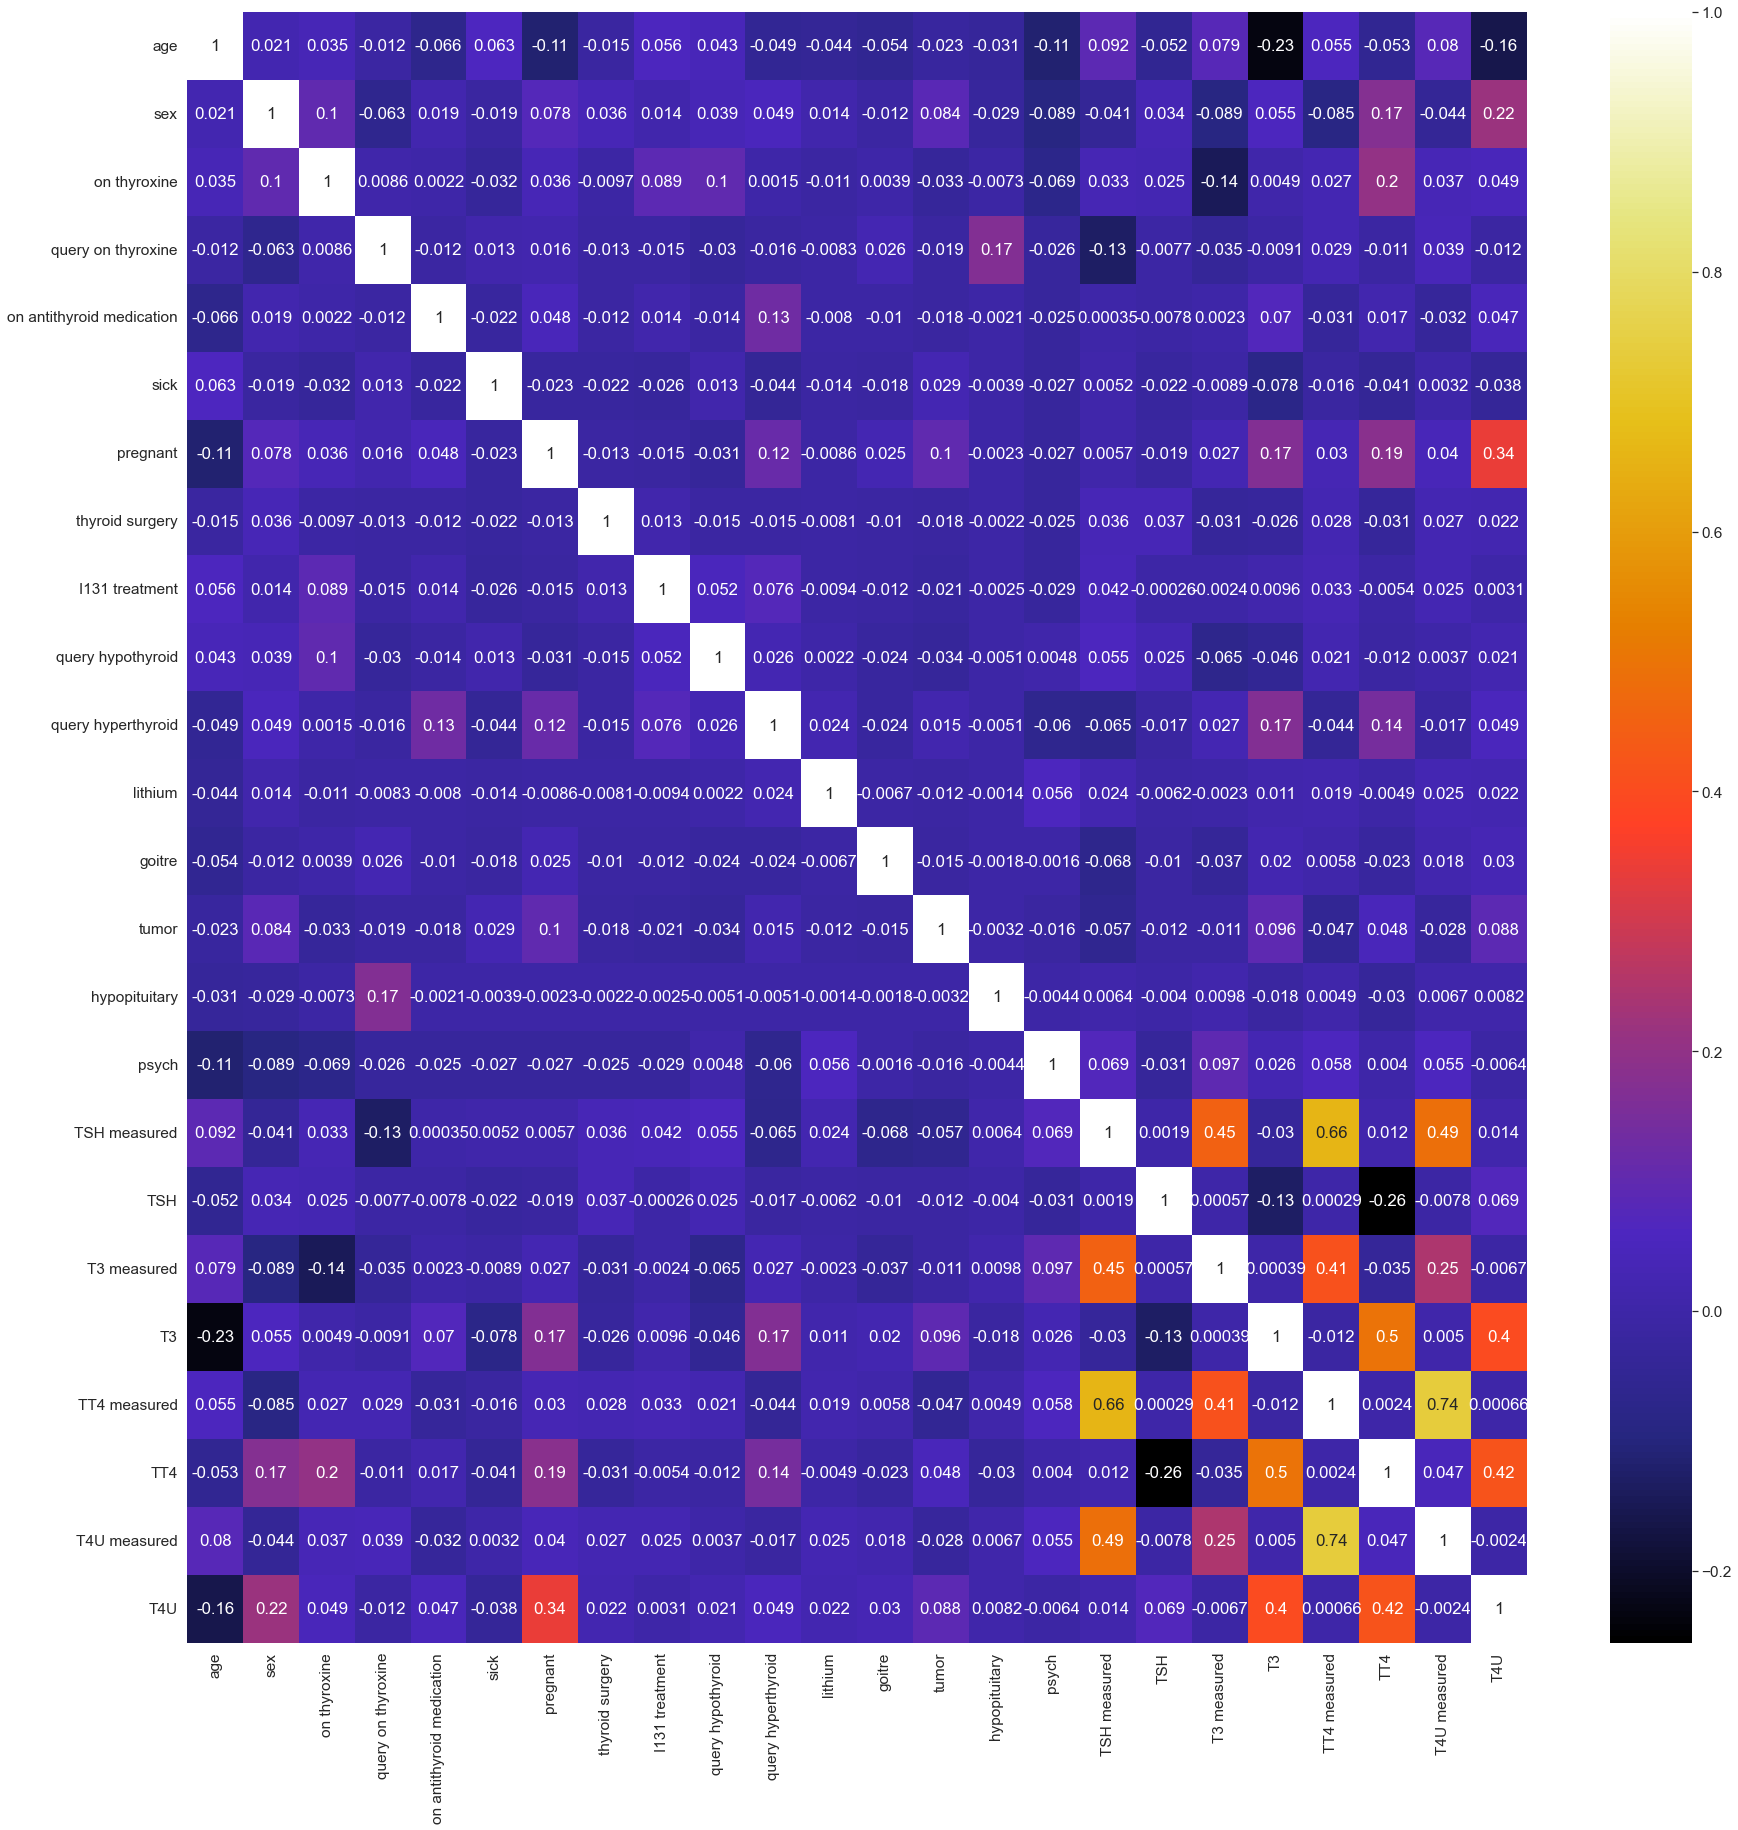

In [ ]:
plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap)
plt.show();

In [ ]:
# By using this function we can select correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

2

In [ ]:
corr_features

{'FTI', 'FTI measured'}

In [ ]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

### Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train)
# X_train = sc.transform(X_train)
# X_test = sc.transform(X_test)

### DT Algo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9955830388692579


### Best Max Depth

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score
# import numpy as np
# import matplotlib.pyplot as plt

# # function for fitting trees of various depths on the training data using cross-validation
# def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
#     cv_scores_list = []
#     cv_scores_std = []
#     cv_scores_mean = []
#     accuracy_scores = []
#     for depth in tree_depths:
#         tree_model = DecisionTreeClassifier(max_depth=depth)
#         cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
#         cv_scores_list.append(cv_scores)
#         cv_scores_mean.append(cv_scores.mean())
#         cv_scores_std.append(cv_scores.std())
#         accuracy_scores.append(tree_model.fit(X, y).score(X, y))
#     cv_scores_mean = np.array(cv_scores_mean)
#     cv_scores_std = np.array(cv_scores_std)
#     accuracy_scores = np.array(accuracy_scores)
#     return cv_scores_mean, cv_scores_std, accuracy_scores
  
# # function for plotting cross-validation results
# def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
#     fig, ax = plt.subplots(1,1, figsize=(15,5))
#     ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
#     ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
#     ylim = plt.ylim()
#     ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
#     ax.set_title(title, fontsize=16)
#     ax.set_xlabel('Tree depth', fontsize=14)
#     ax.set_ylabel('Accuracy', fontsize=14)
#     ax.set_ylim(ylim)
#     ax.set_xticks(depths)
#     ax.legend()

# # fitting trees of depth 1 to 24
# sm_tree_depths = range(1,25)
# sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# # plotting accuracy
# plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
#                                'Accuracy per decision tree depth on training data')

In [ ]:
# idx_max = sm_cv_scores_mean.argmax()
# sm_best_tree_depth = sm_tree_depths[idx_max]
# sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
# sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
# print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
#       sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

### Kfold

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier 

In [ ]:
# k=10
# kf = KFold(n_splits=k, random_state=None)
# model = DecisionTreeClassifier(max_depth=10)
# acc_score = []
# X_train2 = 0
# X_test2 = 0
# y_train2 = 0
# y_test2 = 0

 
# for train_index , test_index in kf.split(X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train , y_test = y[train_index] , y[test_index]
    
    
#     model.fit(X_train,y_train)
#     pred_values = model.predict(X_test)
     
#     acc = accuracy_score(pred_values , y_test)
#     if(acc >= 0.94 and acc < 0.97):
#         X_train2 = X_train 
#         X_test2 = X_test
#         y_train2 = y_train
#         y_test2 = y_test           
        

#     acc_score.append(acc)
    

# avg_acc_score = sum(acc_score)/k
# print('accuracy of each fold - {}'.format(acc_score))
# print('Avg accuracy : {}'.format(avg_acc_score))
